In [1]:
#import all the libraries we need
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pyplot import figure, plot, title, show, fill_between, xlim
from tvb.simulator.lab import *
import numpy as np
from matplotlib import pyplot as plt
import itertools

   INFO  log level set to INFO


In [2]:
#simulation parameters
#Using for loop, we will simulate every G value from 0.01 to 0.05 (Stepsize = 0.001).
#The aim is to have raw data simulation for G range and find the G critical and G max
stepsize=0.001
startpoint=0.01
endpoint=0.051
gcs = np.arange(startpoint,endpoint,stepsize)
gcs=np.around(gcs,decimals=3)
#gcs=[0.013,0.014]
speed=10.
data=[]
t=[]

In [3]:
for i in range(len(gcs)):
    oscilator = models.ReducedSetHindmarshRose()
    white_matter = connectivity.Connectivity.from_file("C:\Users\Wayne\Desktop\AUS-76-DATASET\ALL_Structure_category\Joelle_normalized\AD\z0744A.zip")
    oscilator.variables_of_interest = ["xi"]
    white_matter.speed = np.array([speed])
    print(oscilator)
    white_matter_coupling = coupling.Linear(a=np.array(gcs[i]))
#heunint = integrators.HeunStochastic(dt=2 ** -6)
    heunint = integrators.HeunStochastic(dt=0.01220703125, noise=noise.Additive(nsig=np.array([0.00001])))
# Initialise some Monitors with period in physical time
    mon_raw = monitors.Raw()
    mon_tavg = monitors.TemporalAverage(period=1.)
    what_to_watch = (mon_raw, mon_tavg)
# Initialise a Simulator -- Model, Connectivity, Integrator, and Monitors.
    sim = simulator.Simulator(model=oscilator, connectivity=white_matter,
                          coupling=white_matter_coupling,
                          integrator=heunint, monitors=what_to_watch)
    sim.configure()


# Perform the simulation
    raw_data = []
    raw_time = []
    tavg_data = []
    tavg_time = []

    for raw, tavg in sim(simulation_length=2000):
        if not raw is None:
            raw_time.append(raw[0])
            raw_data.append(raw[1])

        if not tavg is None:
            tavg_time.append(tavg[0])
            tavg_data.append(tavg[1])

    raw_time = raw_time[(len(raw_time)/2):]
    raw_data = raw_data[(len(raw_data)/2):]
    tavg_time = tavg_time[(len(tavg_time) / 2):]
    tavg_data = tavg_data[(len(tavg_data) / 2):]

# Make the lists numpy.arrays for easier use.
    RAW = np.array(raw_data)
    data.append(RAW[:, 0 ,:, 0])
    t=raw_time

WARNING  File 'average_orientations' not found in ZIP.
WARNING  File 'cortical' not found in ZIP.
WARNING  File 'hemispheres' not found in ZIP.
WARNING  File 'areas' not found in ZIP.
ReducedSetHindmarshRose(bound=False, value=None)
WARNING  File 'average_orientations' not found in ZIP.
WARNING  File 'cortical' not found in ZIP.
WARNING  File 'hemispheres' not found in ZIP.
WARNING  File 'areas' not found in ZIP.
ReducedSetHindmarshRose(bound=False, value=None)
WARNING  File 'average_orientations' not found in ZIP.
WARNING  File 'cortical' not found in ZIP.
WARNING  File 'hemispheres' not found in ZIP.
WARNING  File 'areas' not found in ZIP.
ReducedSetHindmarshRose(bound=False, value=None)
WARNING  File 'average_orientations' not found in ZIP.
WARNING  File 'cortical' not found in ZIP.
WARNING  File 'hemispheres' not found in ZIP.
WARNING  File 'areas' not found in ZIP.
ReducedSetHindmarshRose(bound=False, value=None)
WARNING  File 'average_orientations' not found in ZIP.
WARNING  File

WARNING  File 'cortical' not found in ZIP.
WARNING  File 'hemispheres' not found in ZIP.
WARNING  File 'areas' not found in ZIP.
ReducedSetHindmarshRose(bound=False, value=None)
WARNING  File 'average_orientations' not found in ZIP.
WARNING  File 'cortical' not found in ZIP.
WARNING  File 'hemispheres' not found in ZIP.
WARNING  File 'areas' not found in ZIP.
ReducedSetHindmarshRose(bound=False, value=None)
WARNING  File 'average_orientations' not found in ZIP.
WARNING  File 'cortical' not found in ZIP.
WARNING  File 'hemispheres' not found in ZIP.
WARNING  File 'areas' not found in ZIP.
ReducedSetHindmarshRose(bound=False, value=None)
WARNING  File 'average_orientations' not found in ZIP.
WARNING  File 'cortical' not found in ZIP.
WARNING  File 'hemispheres' not found in ZIP.
WARNING  File 'areas' not found in ZIP.
ReducedSetHindmarshRose(bound=False, value=None)
WARNING  File 'average_orientations' not found in ZIP.
WARNING  File 'cortical' not found in ZIP.
WARNING  File 'hemisphere

In [4]:
#Obtain the Global Variance and Mean
mdata=[]
vardata=[]
for i in range(len(gcs)):
    m = []
    var = []
    for x in range(len(data[i])):
        m.append(np.mean(data[i][x,:]))
        var.append(np.var(data[i][x,:]))

    m=np.array(m)
    var=np.array(var)
    mdata.append(m)
    vardata.append(var)

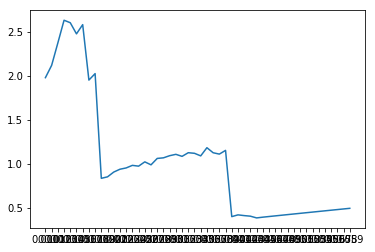

In [5]:
#plot
fd=np.around(np.arange(startpoint,endpoint-stepsize,stepsize),decimals=3)
#plot(the max)
v = []
for z in range(len(vardata)):
    vv=np.array(np.max(vardata[z]))
    v.append(vv)

#plot max of variance
figure(1)
plt.plot(gcs,v)
plt.xticks(gcs)
plt.show()

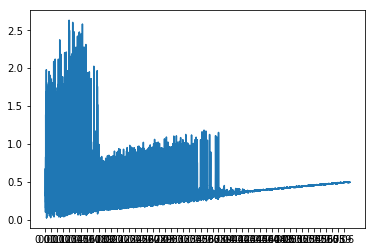

In [6]:
#plot the max of variance (slope)
figure(2)
plt.plot(np.gradient(v))
plt.xticks(range(len(gcs)), (gcs))
plt.show()

In [ ]:
#plot(the all raw signals)
flat=itertools.chain.from_iterable(vardata)
flatarray=list(flat)
B=np.arange(0,len(flatarray), len(vardata[0]))
gcs_list=gcs.tolist()
fig = plt.figure(3)
plt.plot(flatarray)
plt.xticks(B, (gcs_list))
plt.show()

In [ ]:
#gather local minimum
v_lm=argrelextrema(np.array(v), np.less)
v_lmv=v_lm*np.array([stepsize]) + startpoint
v_lmv = np.around(v_lmv[0],decimals=3)
v_lm = v_lm[0]
v_Gc = []
F =[]
for d in v_lm:
    v_G = np.max(v[d])
    v_Gc.append(v_G)
#for f in range(len(v_Gc)):
#    if v_Gc[f] >= 1.0:
#        F=f
#Gc = v_lmv[F+1]
Gc=v_lmv[0]
Gmax = v_lmv[-1]